<a href="https://colab.research.google.com/github/LakshmiAjay/ML-DS/blob/main/11_Multilayer_NN_for_MNIST_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Activation
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [ ]:
print("number of Training example: ",x_train.shape)
print("number of Training example target: ",y_train.shape)
print("number of testing example : ",x_test.shape)
print("number of testing example: ",y_test.shape)

number of Training example:  (60000, 28, 28)
number of Training example target:  (60000,)
number of testing example :  (10000, 28, 28)
number of testing example:  (10000,)


In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

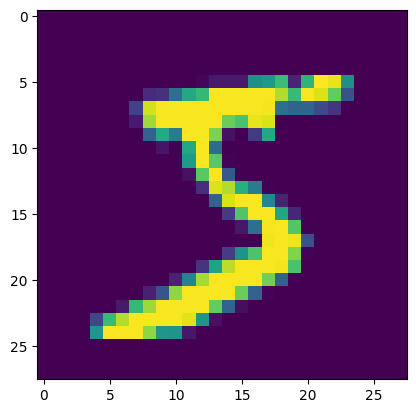

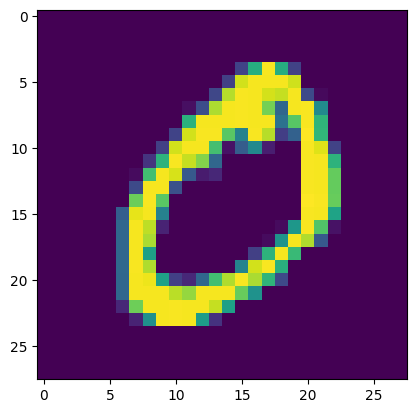

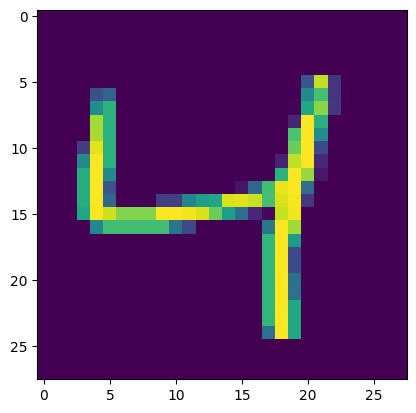

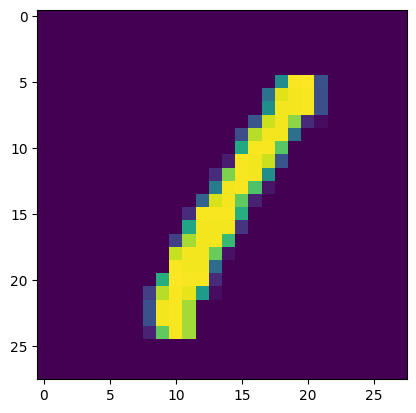

In [ ]:
k=0
for i in range(2):
  for j in range(2):
    plt.imshow(x_train[k])
    k+=1
    plt.show()

In [ ]:
y_train[0:4]

array([5, 0, 4, 1], dtype=uint8)

In [ ]:
X_train=x_train/255
x_test=x_test/255
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

y_train.shape

(60000, 10)

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 242762 (948.29 KB)
Trainable params: 242762 (948.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
train_history = model.fit(x_train,y_train,batch_size=64,epochs=10,verbose=1,validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 7s 9ms/step - loss: 1.5095 - accuracy: 0.8668 - val_loss: 0.3636 - val_accuracy: 0.9237
Epoch 2/10
750/750 [==============================] - 11s 15ms/step - loss: 0.2543 - accuracy: 0.9385 - val_loss: 0.2694 - val_accuracy: 0.9390
Epoch 3/10
750/750 [==============================] - 12s 16ms/step - loss: 0.1611 - accuracy: 0.9567 - val_loss: 0.2051 - val_accuracy: 0.9507
Epoch 4/10
750/750 [==============================] - 11s 15ms/step - loss: 0.1290 - accuracy: 0.9635 - val_loss: 0.2077 - val_accuracy: 0.9530
Epoch 5/10
750/750 [==============================] - 5s 7ms/step - loss: 0.1120 - accuracy: 0.9680 - val_loss: 0.1859 - val_accuracy: 0.9574
Epoch 6/10
750/750 [==============================] - 6s 8ms/step - loss: 0.1073 - accuracy: 0.9692 - val_loss: 0.1802 - val_accuracy: 0.9567
Epoch 7/10
750/750 [==============================] - 5s 7ms/step - loss: 0.1007 - accuracy: 0.9712 - val_loss: 0.1715 - val_accuracy: 0.9647


In [ ]:
train_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

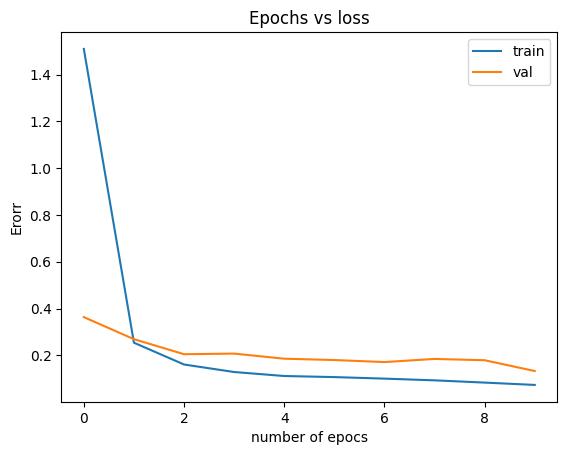

In [ ]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title("Epochs vs loss")
plt.xlabel("number of epocs")
plt.ylabel("Erorr")
plt.legend(['train','val'])
plt.show()

In [ ]:
score=model.evaluate(x_test,y_test,batch_size=64)
print("testing accuray: ",score[1])

157/157 [==============================] - 1s 4ms/step - loss: 2.2479 - accuracy: 0.1115
testing accuray:  0.11150000244379044
